In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

In [5]:
default = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


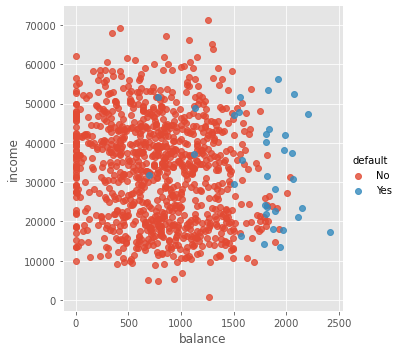

In [7]:
sns.lmplot(x = 'balance', y = 'income', data = default.sample(1000), hue = 'default', fit_reg = False)

<AxesSubplot:xlabel='student', ylabel='balance'>

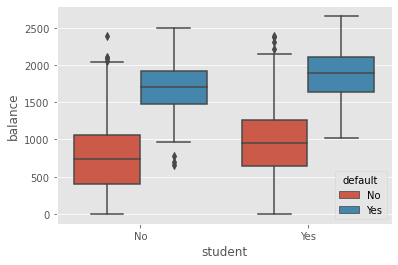

In [8]:
sns.boxplot(x = 'student', y = 'balance', data = default, hue = 'default')

In [9]:
import statsmodels.formula.api as smf

In [10]:
default ['Yes'] = (default['default'] == 'Yes').astype(int)
default.head()

,default,student,balance,income,Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


<AxesSubplot:xlabel='balance', ylabel='Yes'>

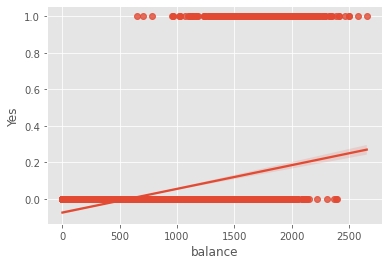

In [11]:
sns.regplot(x = 'balance', y = 'Yes', data = default)

## Logistic Regression

In [12]:
results = smf.logit('Yes ~ balance', data = default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.4534
Time:                        16:52:41   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

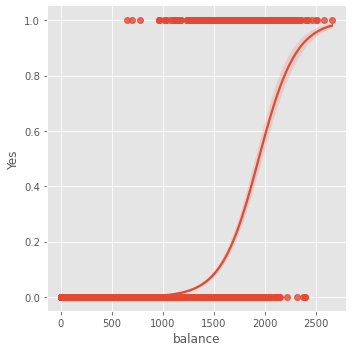

In [14]:
sns.lmplot(y = 'Yes', x = 'balance', data = default, logistic = True)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
X = np.column_stack((np.ones(len(default)), default['balance']))
lr.fit(X, default['Yes'])

LogisticRegression()

In [17]:
lr.coef_

array([[-5.16481986,  0.00530575]])

In [18]:
lr.predict_proba([[1,1000]])

array([[0.99346413, 0.00653587]])

## Multiple Logistic Regression

In [19]:
results = smf.logit('Yes ~ student + balance + income', data = default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.4619
Time:                        16:52:59   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<AxesSubplot:xlabel='student', ylabel='balance'>

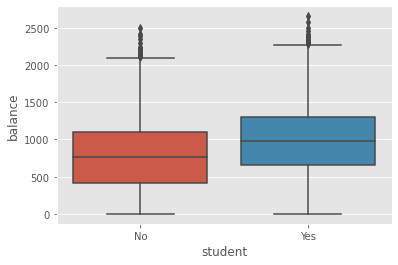

In [20]:
sns.boxplot(x = default['student'], y = default['balance'])

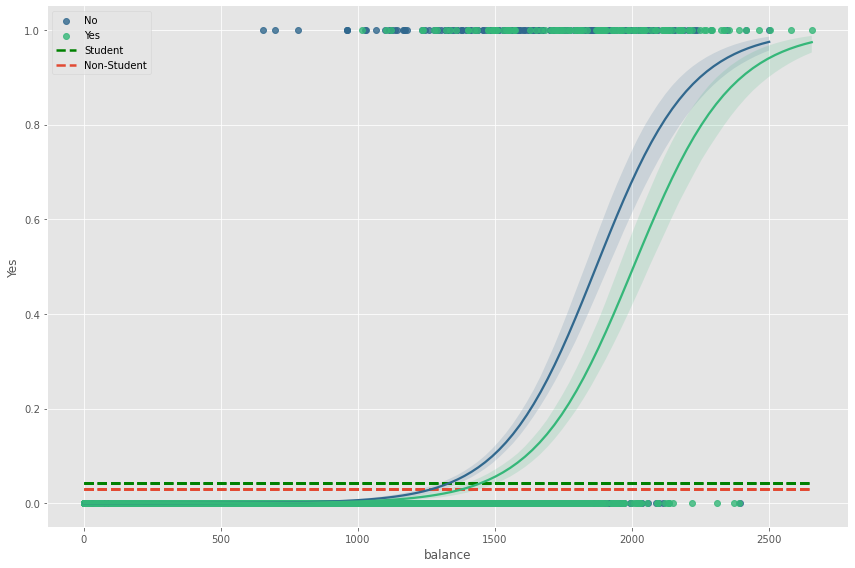

In [21]:
X = np.column_stack((np.ones(len(default)), default['income'],default['balance']))
fig = sns.lmplot(x = 'balance', y = 'Yes', logistic = True,  hue = 'student', data = default, palette = 'viridis', height = 8, aspect = 12/8)
fig._legend.remove()
plt.hlines(default[(default['Yes'] == 1) & (default['student'] == 'Yes')].count()/len(default[(default['student'] == 'Yes')]), xmin = default['balance'].min(), xmax = default['balance'].max(), linestyle = '--', lw = 2.5, label = 'Student', color = 'green')
plt.hlines(default[(default['Yes'] == 1) & (default['student'] == 'No')].count()/len(default[(default['student'] == 'No')]), xmin = default['balance'].min(), xmax = default['balance'].max(),linestyle = '--',lw = 2.5, label = 'Non-Student' )
plt.legend()


### Performing LDA on Default Data Set

In [22]:
# Predicting whether a student will default based on student status and credit card balance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

lda = LinearDiscriminantAnalysis()
lda.fit(X,default['Yes'])
confusion_matrix(default['Yes'], lda.predict(X))

array([[9647,   20],
       [ 256,   77]])

### Stock Market Prediciton

In [23]:
# Loading the stock market dataset
stockmarket = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/smarket.csv")
stockmarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [24]:
stockmarket['Up'] = (stockmarket['Direction'] == 'Up').astype(int)
stockmarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [25]:
X = stockmarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
Y = stockmarket['Up'].values

In [26]:
train_bool = stockmarket['Year'].values < 2005
X_train = X[train_bool]
Y_train = Y[train_bool]
X_test = X[~train_bool]
Y_test = Y[~train_bool]

In [27]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data = stockmarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                0.001651
Time:                        16:53:20   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [29]:
confusion_matrix(Y_test, lr.predict(X_test), labels =[1,0] )

array([[111,  30],
       [ 74,  37]])

In [30]:
lda = LinearDiscriminantAnalysis()

In [31]:
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [32]:
confusion_matrix(Y_test, lda.predict(X_test), labels = [1, 0])

array([[111,  30],
       [ 74,  37]])

In [33]:
lda.priors_

array([0.49198397, 0.50801603])

In [34]:
qda = QuadraticDiscriminantAnalysis()
type(X_train)
qda.fit(X_train.iloc[:,:2], Y_train)

QuadraticDiscriminantAnalysis()

In [35]:
confusion_matrix(Y_test, qda.predict(X_test.iloc[:,:2]), labels = [1,0] )

array([[121,  20],
       [ 81,  30]])

In [36]:
# K - Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [38]:
knn.fit(X_train.iloc[:,:2], Y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
confusion_matrix(Y_test, knn.predict(X_test.iloc[:,:2]), labels = [1,0])

array([[86, 55],
       [63, 48]])

### Exercises

In [40]:
#13
weekly = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/weekly.csv")
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [41]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


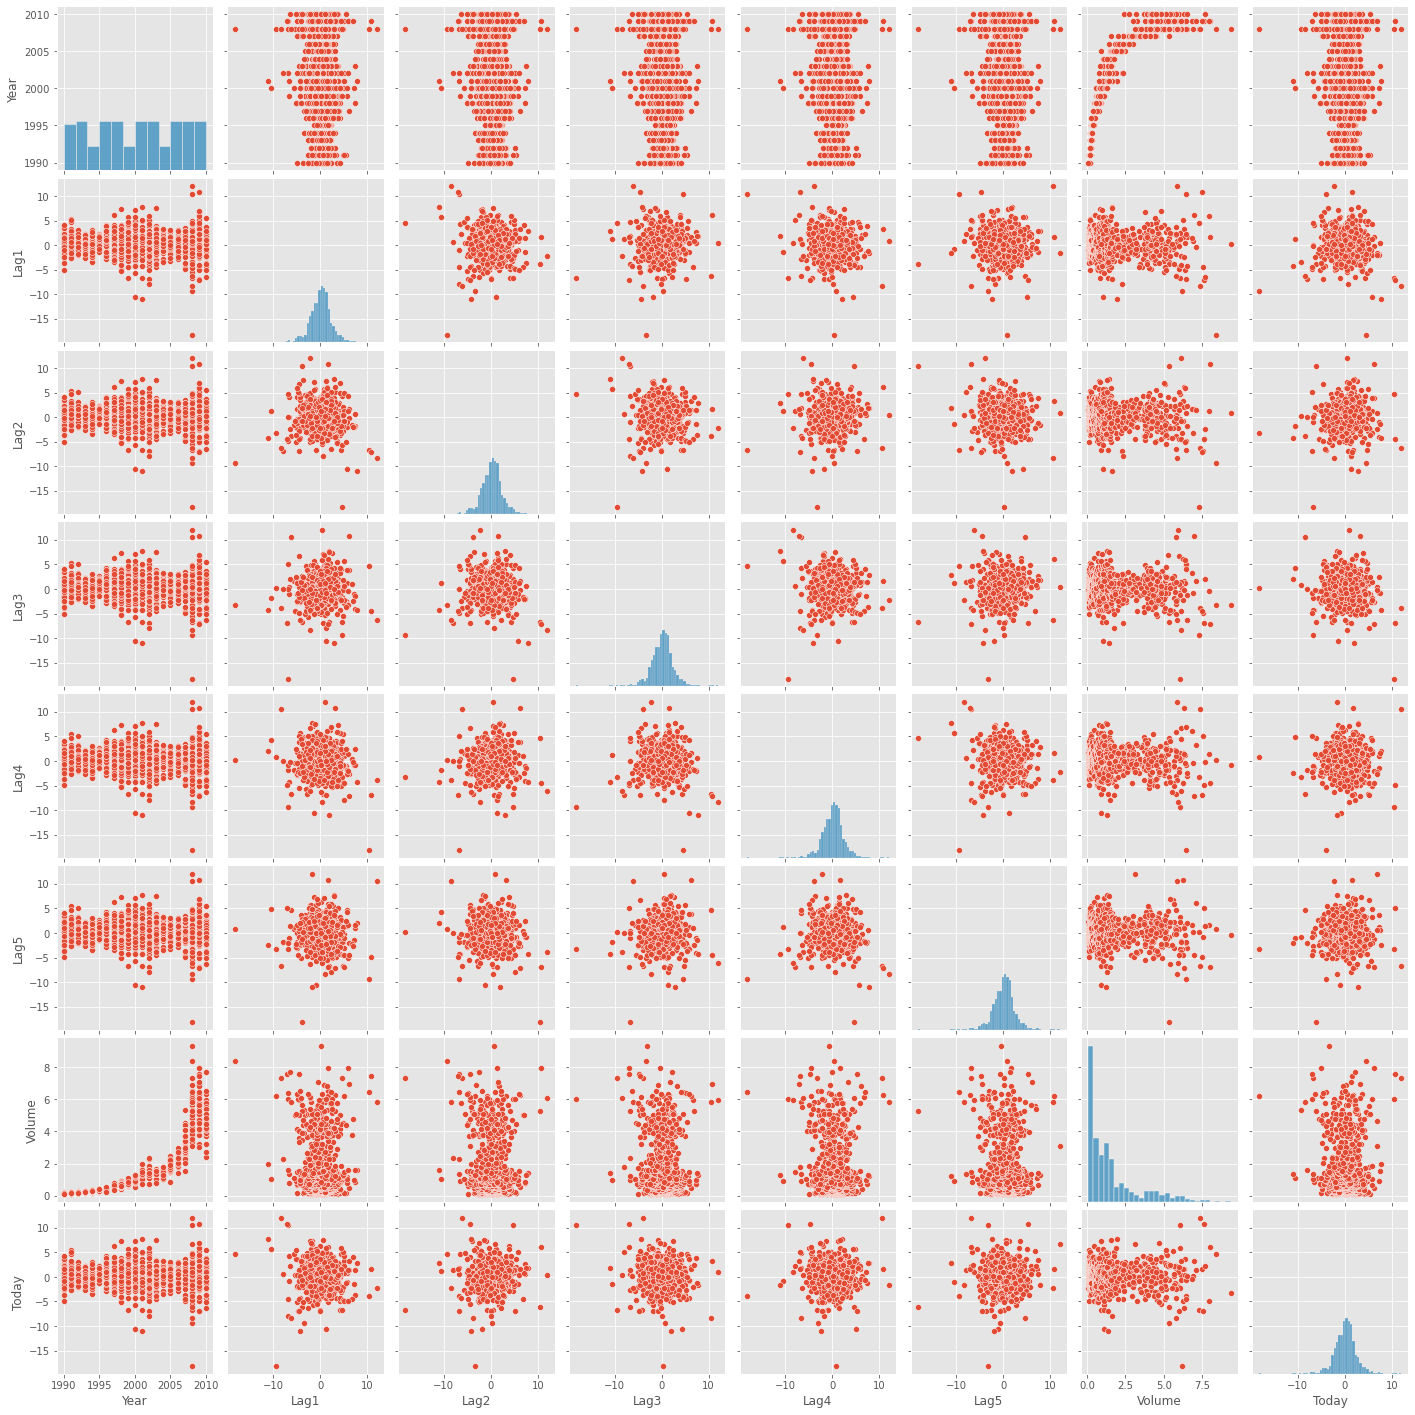

In [42]:
sns.pairplot(data = weekly)

In [43]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [44]:
weekly['prediction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [45]:
results = smf.logit('prediction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data = weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682615
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                0.006327
Time:                        16:53:29   Log-Likelihood:                -743.37
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.09186
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.000       0.109       0.352
Lag1          -0.0401      0.026     -1.522      0.128      -0.092       0.012
Lag2           0.0602      0.027      2.249      0.025       0.008       0.113
Lag3          -0.0151      0.027     -0.566      0.571      -0.067       0.037
Lag4          -0.0268      0.026     -1.013      0.311      -0.079       0.025
Lag5          -0.0135      0.026     -0.512      0.609      -0.065       0.038
==============================================================================
"""

In [ ]:
predicts = np.where(results.predict(np.column_stack((np.ones(len(weekly)), weekly['Lag1'], weekly['Lag2'], weekly['Lag3'], weekly['Lag4'], weekly['Lag5']))) > .5, 1, 0)
confusion_matrix(weekly['prediction'], predicts, labels = [1,0])

In [46]:
X = np.column_stack((np.ones(len(weekly)), weekly['Lag1'], weekly['Lag2'], weekly['Lag3'], weekly['Lag4'], weekly['Lag5']))
Y = weekly['prediction']
results = lr.fit(X, Y)

ERROR! Session/line number was not unique in database. History logging moved to new session 66


In [47]:
confusion_matrix(Y, results.predict(X), labels = [1,0])

array([[565,  40],
       [435,  49]])

In [48]:
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']]
X_test = weekly[~year_bool][['ones', 'Lag2']]
Y_train = weekly[year_bool]['prediction']
Y_test = weekly[~year_bool]['prediction']

In [49]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [50]:
confusion_matrix(Y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

In [51]:
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [52]:
confusion_matrix(Y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

In [53]:
qda.fit(X_train, Y_train)

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [54]:
confusion_matrix(Y_test, qda.predict(X_test))

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]])

In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [56]:
X_knn = np.array(X_train.iloc[:,1]).reshape(-1,1)
knn.fit(X_knn, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
X_knn_test = np.array(X_test.iloc[:,1]).reshape(-1,1)
confusion_matrix(Y_test, knn.predict(X_knn_test))

array([[21, 22],
       [31, 30]])

In [58]:
#naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [59]:
confusion_matrix(Y_test, classifier.predict(X_test), labels = [1,0])

array([[61,  0],
       [43,  0]])

In [60]:
# 14 

auto = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
auto['mpg01'] = np.where(auto['mpg']>= auto['mpg'].median(), 1, 0)

In [62]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


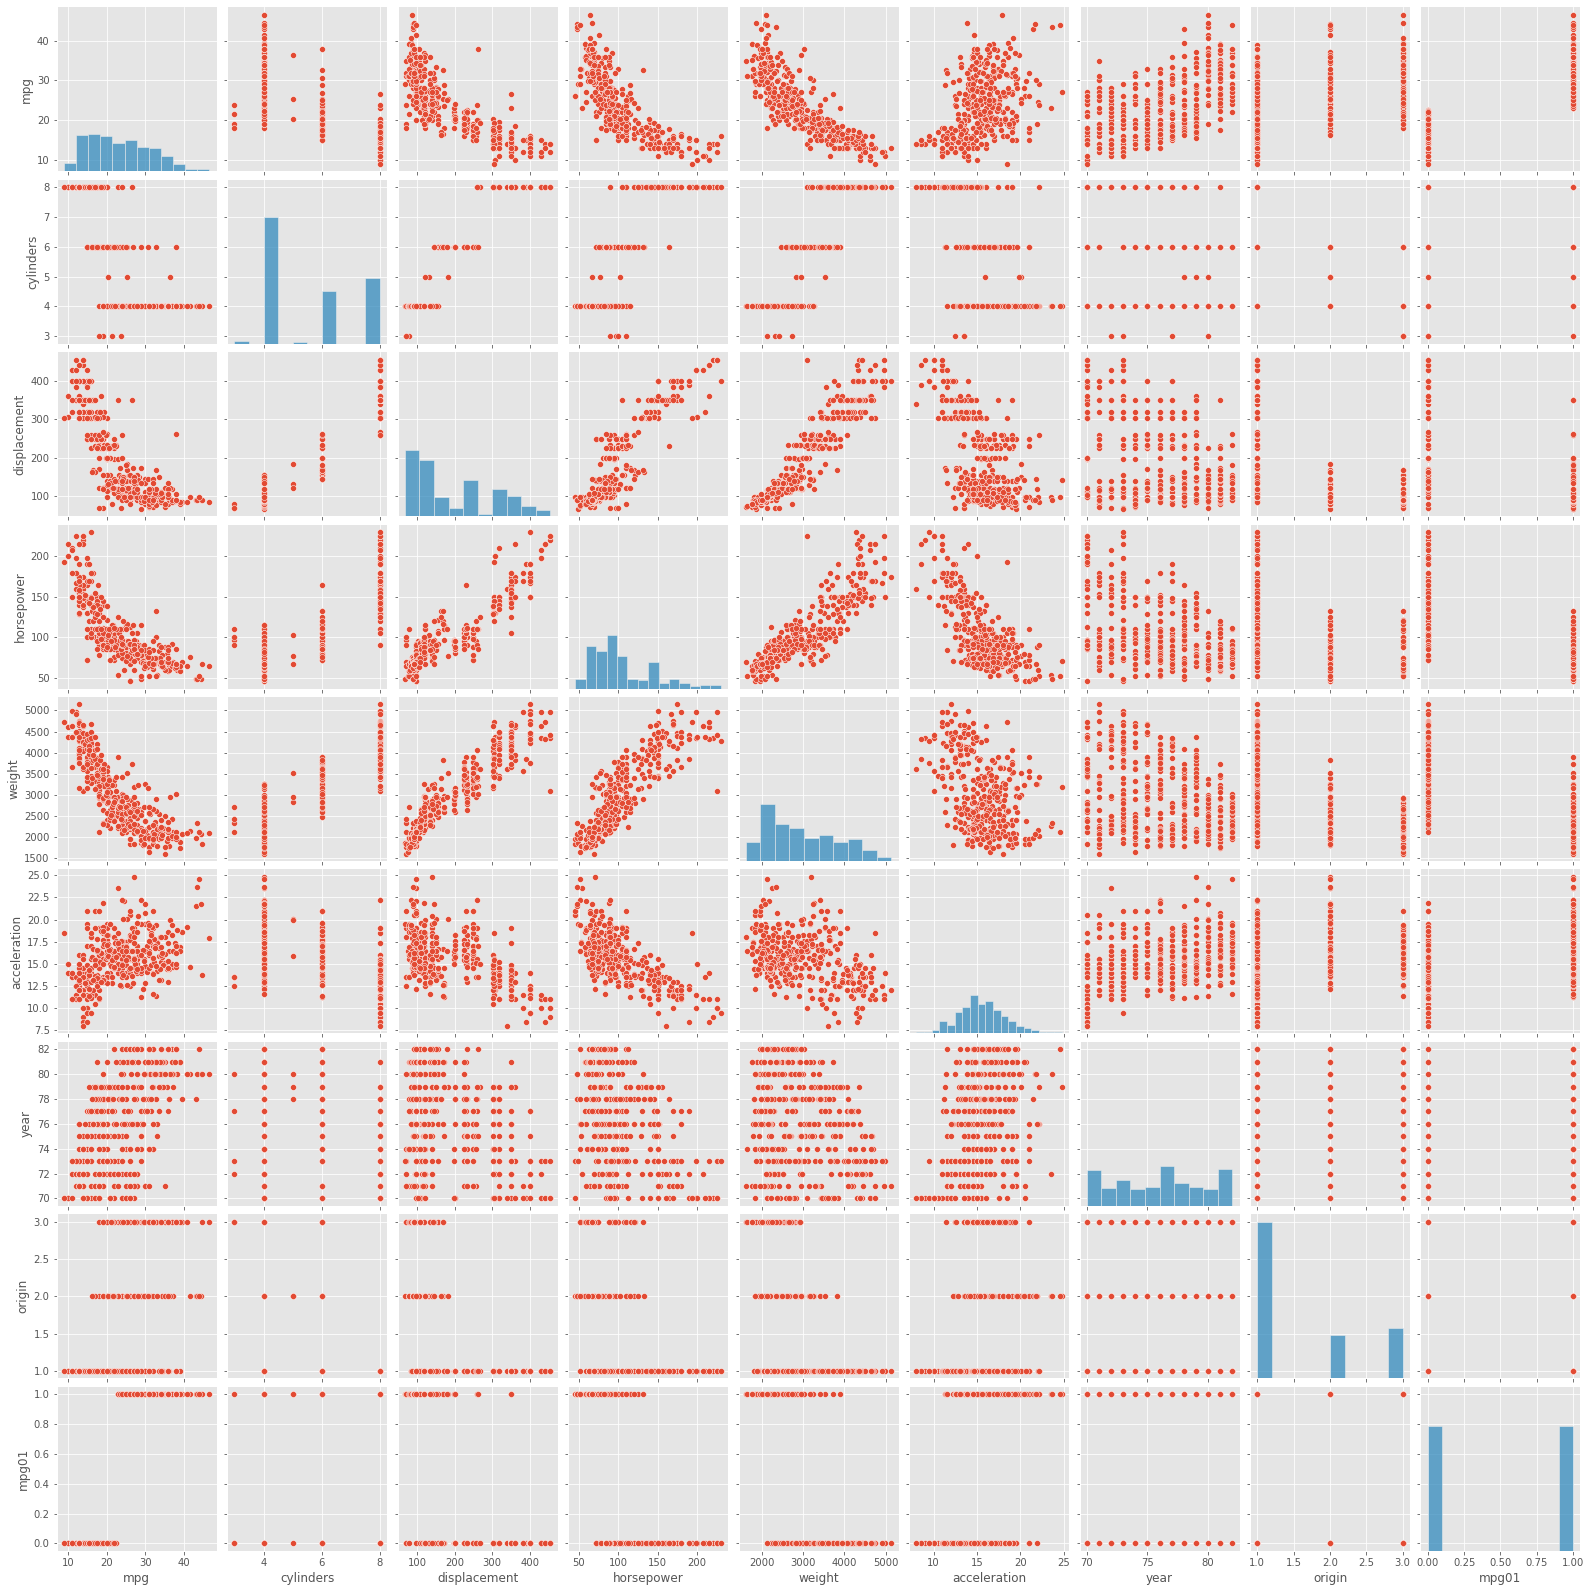

In [63]:
sns.pairplot(auto)

<AxesSubplot:xlabel='mpg01', ylabel='displacement'>

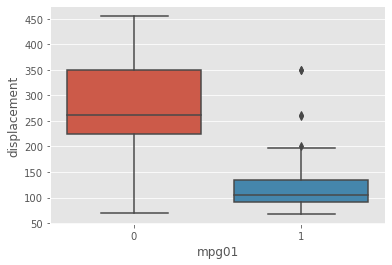

In [64]:
sns.boxplot(y = auto['displacement'], x = auto['mpg01'])

In [65]:
import random 
arr = np.arange(0,391)
np.random.shuffle(arr)

rand_train = np.sort(arr[:355])
rand_test = np.sort(arr[355:])

training_data = auto[auto.index.isin(rand_train)]
test_data = auto[auto.index.isin(rand_test)]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = auto[['cylinders', 'origin']]
Y = auto[['mpg01']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , random_state = 1)

In [68]:
results = lda.fit(X_train, Y_train.values.ravel())

In [69]:
confusion_matrix(Y_test, results.predict(X_test))

array([[51,  3],
       [ 4, 40]])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, results.predict(X_test))

0.9285714285714286

In [71]:
lr = LogisticRegression(C=.01)
results = lr.fit(X_train, Y_train.values.ravel())

In [72]:
accuracy_score(Y_test, results.predict(X_test))

0.9285714285714286

In [73]:
results = qda.fit(X_train, Y_train.values.ravel())

In [74]:
accuracy_score(Y_test, results.predict(X_test))

0.9183673469387755

In [75]:
results = classifier.fit(X_train, Y_train.values.ravel())

In [76]:
accuracy_score(Y_test, results.predict(X_test))

0.9183673469387755

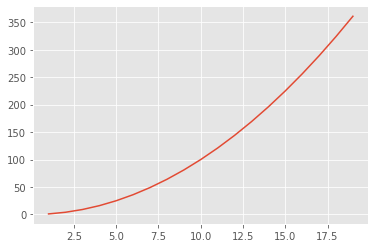

In [81]:
#14 Writing Functions

def Power():
    return pow(2,3)
Power()
    
def Power2(x,a):
    return pow(x,a)

Power2(3,4)

def PlotPower(rng , a):
    plt.plot(rng, [pow(x,a) for x in rng])
PlotPower(range(1,20),2)

In [84]:
#15 Boston dataset

boston = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/boston.csv")
boston.head()
boston['crime_rate'] = np.where(boston['crim'] >= boston['crim'].median(), 1, 0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime_rate
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,1
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,1
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,1
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1,1
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1,1
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6,1
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5,1
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7,1


In [99]:
X = np.column_stack((np.ones(len(boston)),boston['zn'], boston['indus'], boston['chas'], boston['nox'], boston['rm'], boston['age'], boston['dis'], boston['rad'], boston['tax'], boston['ptratio'], boston['black'], boston['lstat'], boston['medv']))
Y = boston['crime_rate']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.coef_
accuracy_score(Y_test, lr.predict(X_test))

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8503937007874016

In [104]:
qda = QuadraticDiscriminantAnalysis()
X_train = X_train[:,1:]
X_test = X_test[:, 1:]
qda.fit(X_train, Y_train)
accuracy_score(Y_test, qda.predict(X_test))

0.905511811023622

In [106]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
accuracy_score(Y_test, knn.predict(X_test))

0.8740157480314961